In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor

In [3]:
def error(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return

    l = len(data)
    error = np.zeros(l)  # Inizializza un array numpy di zeri della stessa lunghezza di data e model

    for i in range(l):
        if data[i] != 0:
            error[i] = 100 * abs((data[i] - model[i]) / data[i])

    return error


In [4]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        if data[i] == 0:
            error = 0 
        else:
            error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (1 - avg_error)
    
    return accuracy_percentage


In [5]:
model = PySRRegressor()

In [6]:
def bran(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x,T, s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')


In [40]:
def branlog(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = 10**(a.predict(x))
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x,T, s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

In [24]:
def bran2(x, y, T, alpha):
    a = model.from_file(alpha)
    T_1 = (a.predict(y))
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x, T, s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()

    if not isinstance(T, np.ndarray):
        T = np.array(T)

    axs[1].scatter(x, error(T, T_1), s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    
    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

In [25]:
def bran2log(x, y, T, alpha):
    a = model.from_file(alpha)
    T_1 = 10**(a.predict(y))
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x, T, s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()

    if not isinstance(T, np.ndarray):
        T = np.array(T)

    axs[1].scatter(x, error(T, T_1), s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    
    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

----
# WITHOUT MASSIVE NEUTRINOS
----

In [8]:
tf = pd.read_csv('TF_16.csv')
k = tf['k (h/Mpc)'].values
z = (tf['k (h/Mpc)']/tf['omega_m']).values
x = tf['x'].values
y = pd.DataFrame({'k': tf['k (h/Mpc)'], 'om_b': tf['omega_b'],'om_m': tf['omega_m']})
T = tf['T(k)'].values
x = x.reshape(-1,1)
z = z.reshape(-1,1)

$$ T(x)=- \frac{1.96}{- \frac{17.4 x^{0.0917}}{\left(\frac{1}{x}\right)^{1.31}} - 1.96}=\frac{1}{1+8.88x^{1.40}} $$






Checking if model3-3108.pkl exists...
Loading model from model3-3108.pkl
Model equation is:  - \frac{1.96}{- \frac{17.4 x^{0.0917}}{\left(\frac{1}{x}\right)^{1.31}} - 1.96}
The accuracy of the model is:  96.16 %
Max percentage error is:  44.87 %


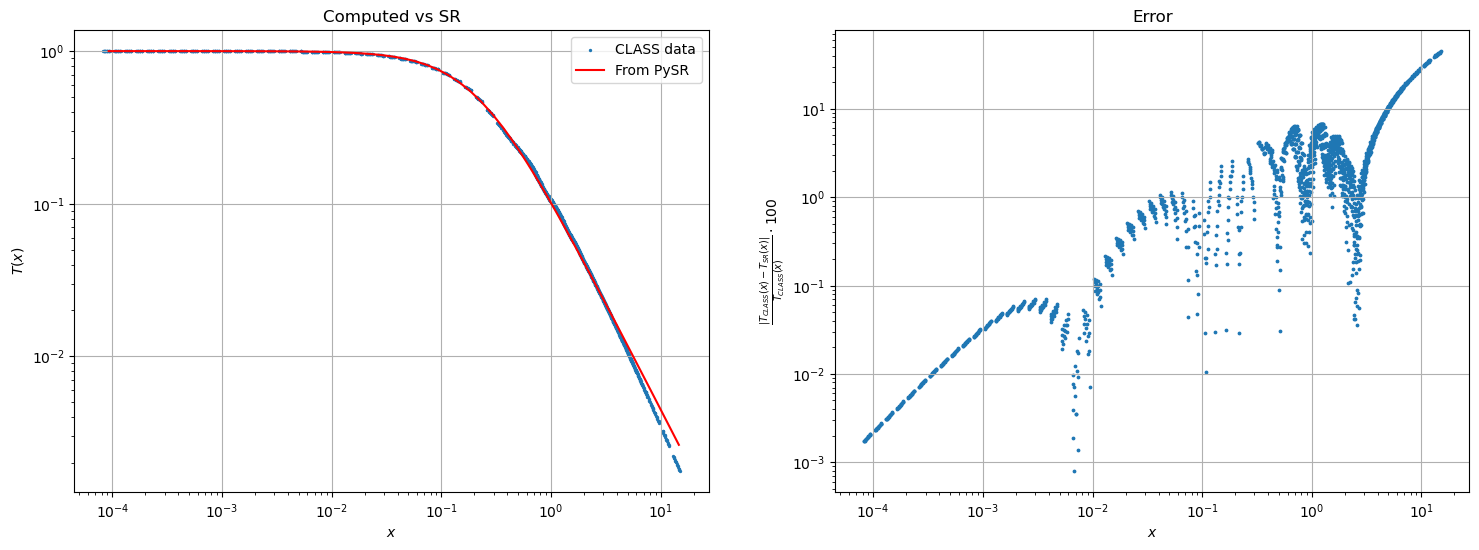

In [9]:
bran(x,T,'model3-3108.pkl')

without using x
$$\frac{1}{11.0 \left(\frac{k}{\omega_{m}}\right)^{1.38} + 1}$$

Checking if model1-0709.pkl exists...
Loading model from model1-0709.pkl
Model equation is:  \frac{om_{m}}{11.0 om_{m} \left(\frac{k}{om_{m}}\right)^{1.38} + om_{m}}
The accuracy of the model is:  -3487.91 %
Max percentage error is:  56705.6 %


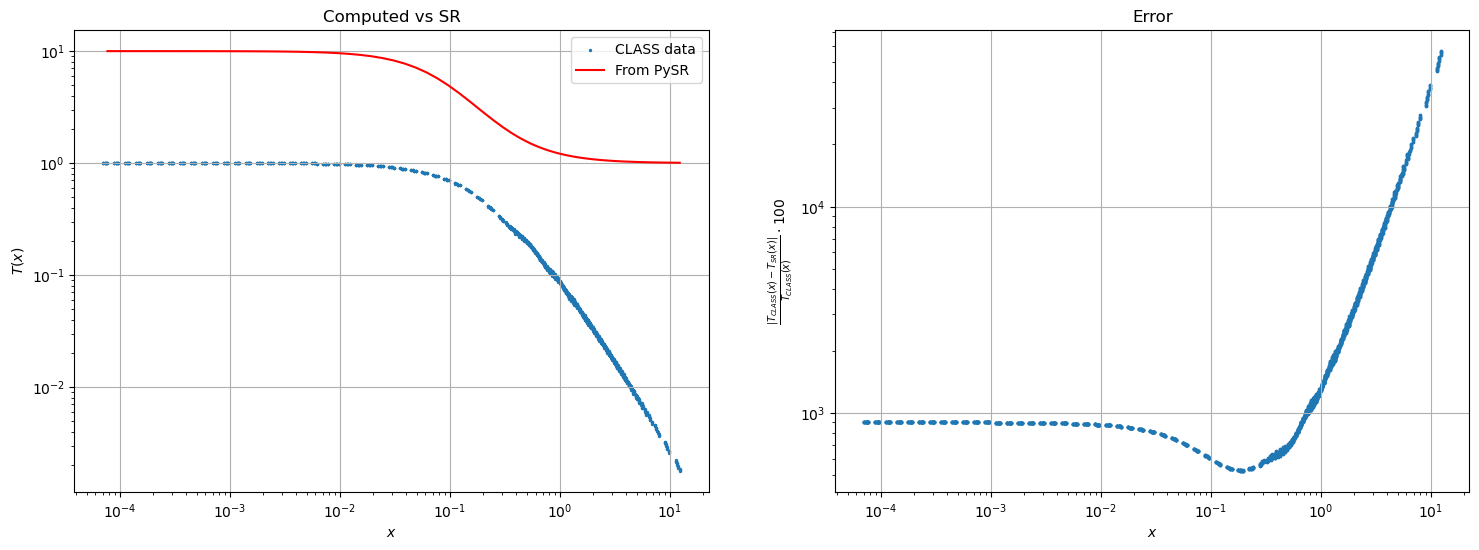

In [10]:
bran2(k/tf['omega_m'],y,T,'model1-0709.pkl')

searching now with
$$z:=\frac{k}{\omega_m}$$
$$- 0.000834^{z} z + \frac{1}{10.76z^{1.48} + 1}$$

Checking if model2-0709.pkl exists...
Loading model from model2-0709.pkl
Model equation is:  - 0.000834^{x_{0}} x_{0} + \frac{0.0928}{x_{0}^{1.48} + 0.0928}
The accuracy of the model is:  97.92 %
Max percentage error is:  26.99 %


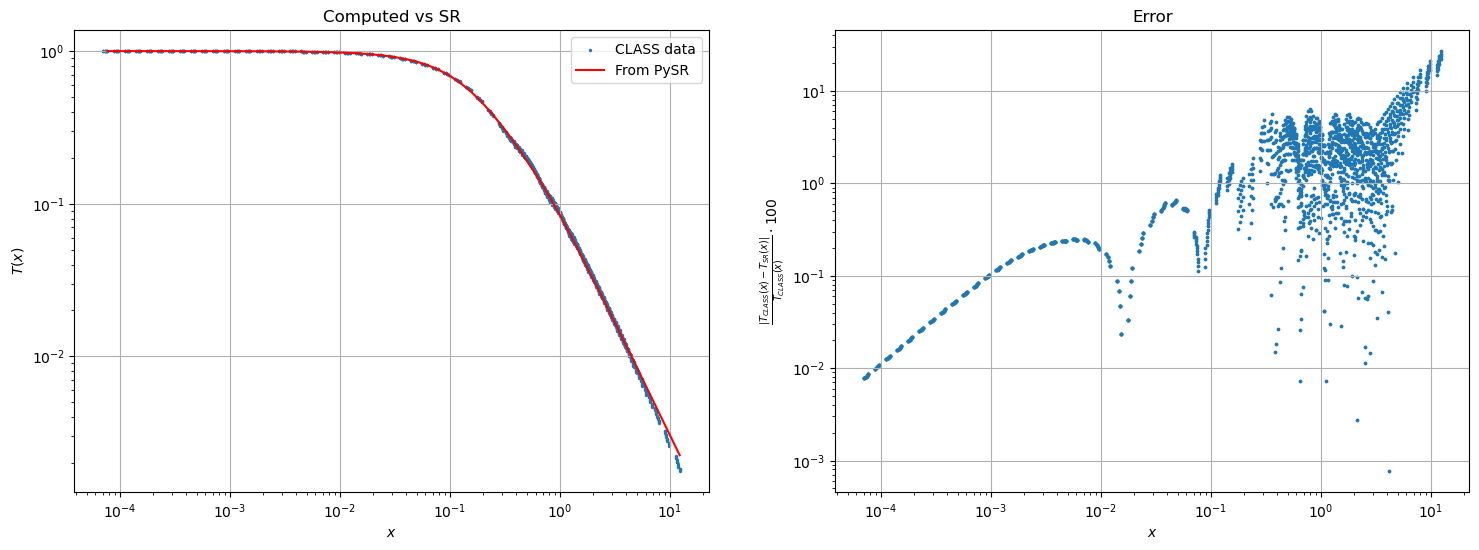

In [11]:
bran(z,T,'model2-0709.pkl')

----
# WITH ONE MASSIVE NEUTRINO
----

$$T(x)=\frac{0.745}{x + 5.19 x^{1.50} + 0.745}$$

In [36]:
tf2 = pd.read_csv('TF_64.csv')
k2 = (tf2['k (h/Mpc)']).values
z2 = (tf2['k (h/Mpc)']/tf2['omega_m']).values
x2 = (tf2['x'].values).reshape(-1,1)
y2 = pd.DataFrame({'k': tf2['k (h/Mpc)'], 'omega_b': tf2['omega_b'],'omega_m': tf2['omega_m'],'omega_nu': tf2['omega_nu']})
T2 = (tf2['T(k)']).values
logT2 = (tf2['log10(T(k))']).values

In [13]:
missing_values = tf.isna().sum().sum()  # Somma di tutti i valori mancanti nel DataFrame
if missing_values > 0:
    print("Il DataFrame contiene valori mancanti.")
else:
    print("Il DataFrame non contiene valori mancanti.")


Il DataFrame non contiene valori mancanti.


Checking if hall_of_fame_2023-09-27_114625.999.pkl exists...
Loading model from hall_of_fame_2023-09-27_114625.999.pkl
Model equation is:  \frac{0.123}{x^{1.37} + 0.123}
The accuracy of the model is:  93.31 %
Max percentage error is:  68.4 %


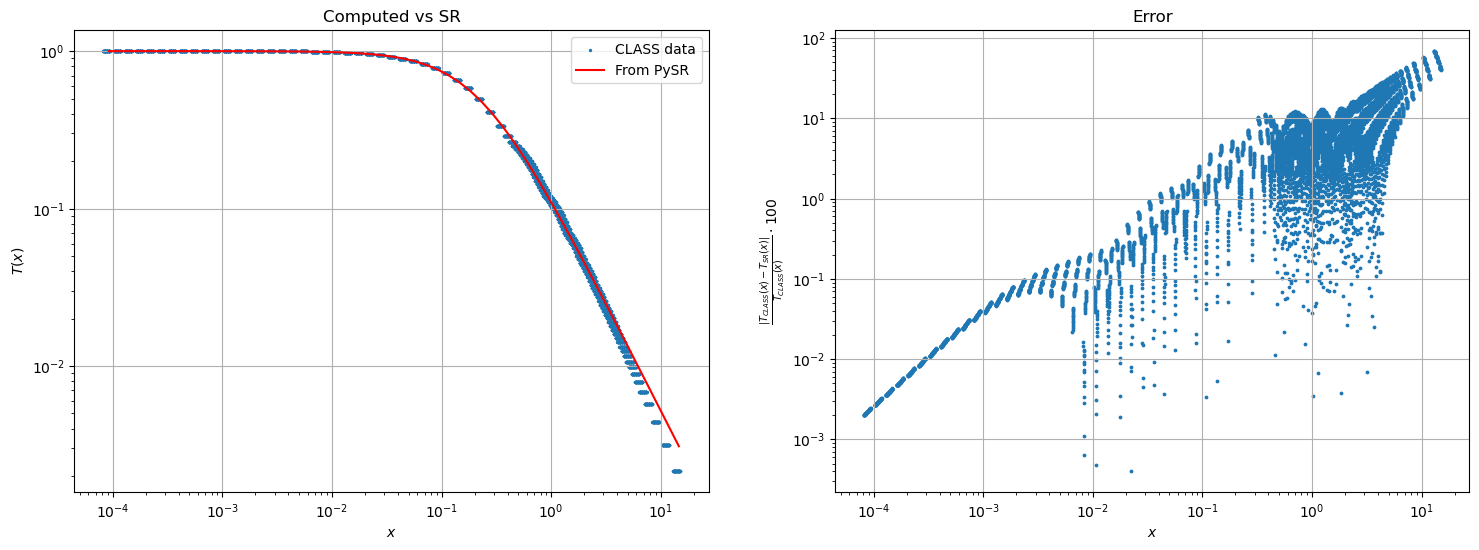

In [42]:
bran(x2,T2,'hall_of_fame_2023-09-27_114625.999.pkl')


Checking if hall_of_fame_2023-09-26_151511.831.pkl exists...
Loading model from hall_of_fame_2023-09-26_151511.831.pkl
Model equation is:  \frac{1.00}{8.16 x^{1.38} + 1.00}
The accuracy of the model is:  93.54 %
Max percentage error is:  65.9 %


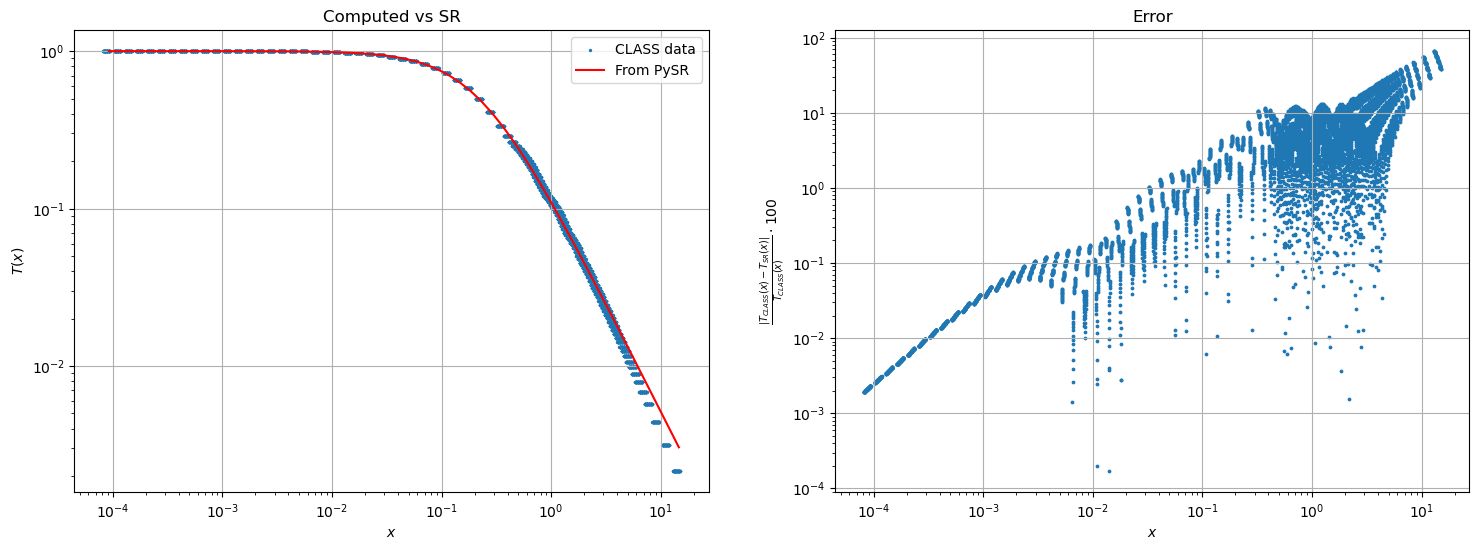

In [34]:
bran(x2,T2,'hall_of_fame_2023-09-26_151511.831.pkl')

Checking if model1-nu-3108.pkl exists...
Loading model from model1-nu-3108.pkl
Model equation is:  \frac{0.745}{x + 5.19 x^{1.50} + 0.745}
The accuracy of the model is:  95.33 %
Max percentage error is:  34.89 %


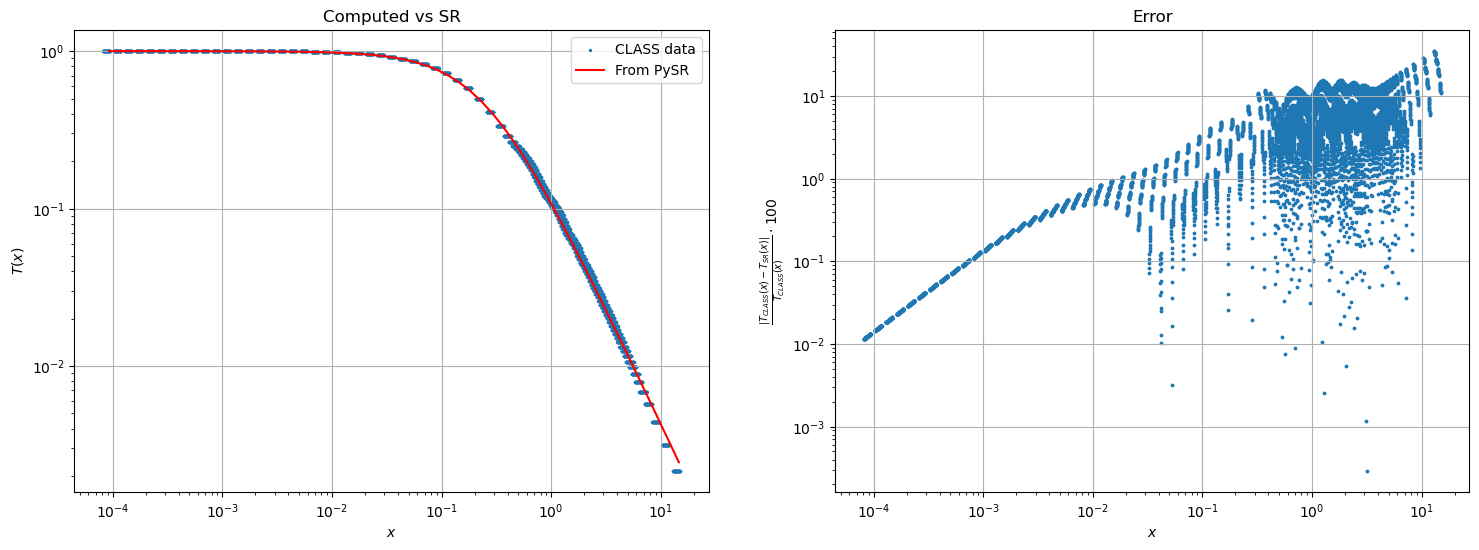

In [19]:
bran(x2,T2,'model1-nu-3108.pkl')

without using x

$$\frac{1}{1 + \frac{44.0 k^{1.37}}{\omega^{0.63}_{m}}}$$

Checking if model1-nu-1409.pkl exists...
Loading model from model1-nu-1409.pkl
Model equation is:  \frac{\omega_{m}}{\omega_{m} + \frac{44.0 \left(k \omega_{m}\right)^{1.37}}{\omega_{m}}}
The accuracy of the model is:  95.01 %
Max percentage error is:  55.29 %


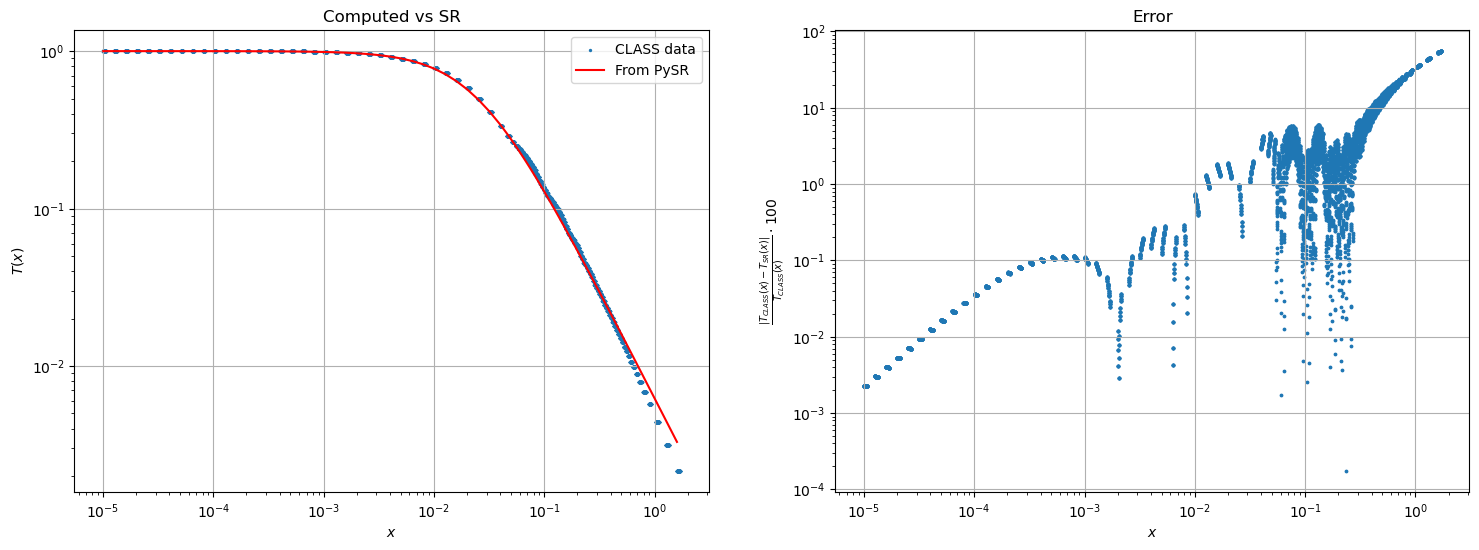

In [ ]:
a = model.from_file('model1-nu-1409.pkl')
T_1 = 1/(1+44*tf2['k (h/Mpc)']**1.37/tf2['omega_m']**0.63)
print('Model equation is: ', a.latex())
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
axs[0].scatter(tf2['k (h/Mpc)'],T2, s=2, label='CLASS data')
axs[0].plot(tf2['k (h/Mpc)'][0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$T(x)$')
axs[0].set_title('Computed vs SR')
axs[0].loglog()
axs[0].grid(True)
axs[0].legend()


axs[1].scatter(tf2['k (h/Mpc)'],error(T2,T_1),s=3)
axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
axs[1].set_title('Error')
axs[1].grid(True)
axs[1].loglog()

print('The accuracy of the model is: ',np.round(accuracy(T2,T_1),2),'%')
print('Max percentage error is: ',np.round(np.amax(error(T2,T_1)),2),'%')

$$ \frac{1.21}{\frac{59.0 k^{1.37} \log{\left(10 \right)}^{1.37}}{\omega_{m} + 0.869} + 1.21} $$

Checking if hall_of_fame_2023-09-26_115315.409.pkl exists...
Loading model from hall_of_fame_2023-09-26_115315.409.pkl
Model equation is:  \frac{1.21}{\frac{59.0 k^{1.37} \log{\left(10 \right)}^{1.37}}{\omega_{m} + 0.869} + 1.21}
The accuracy of the model is:  94.97 %
Max percentage error is:  59.08 %


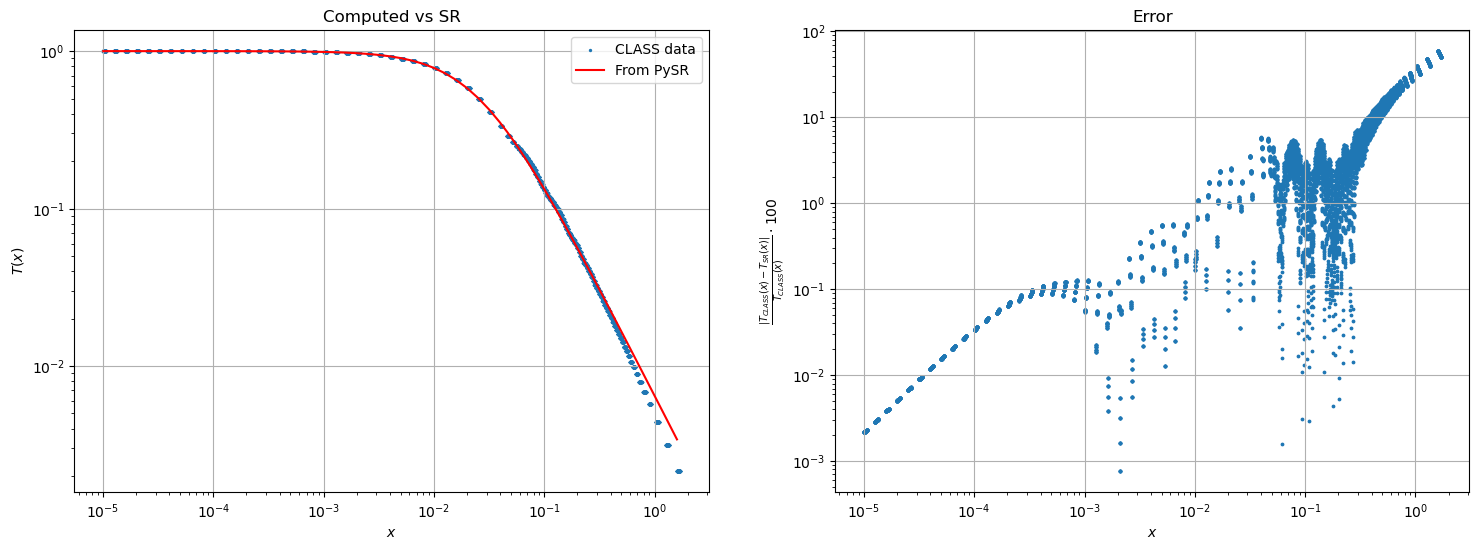

In [26]:
bran2(k2,y2,(T2),'hall_of_fame_2023-09-26_115315.409.pkl')

----
# $\log T(k)$ with one massive neutrino
----

### $$ \log T(k) = \left(1.84 - \omega_{m}\right) \log{\left(\frac{0.0453}{k + 0.0446} \right)} $$

### $$T(k) = \left(\frac{0.0453}{k + 0.0446} \right)^{\left(1.84 - \omega_{m}\right)}$$

Checking if hall_of_fame_2023-09-27_110611.329.pkl exists...
Loading model from hall_of_fame_2023-09-27_110611.329.pkl
Model equation is:  \frac{\left(1.84 - \omega_{m}\right) \log{\left(\frac{0.0453}{k + 0.0446} \right)}}{\log{\left(10 \right)}}
The accuracy of the model is:  97.89 %
Max percentage error is:  9.19 %


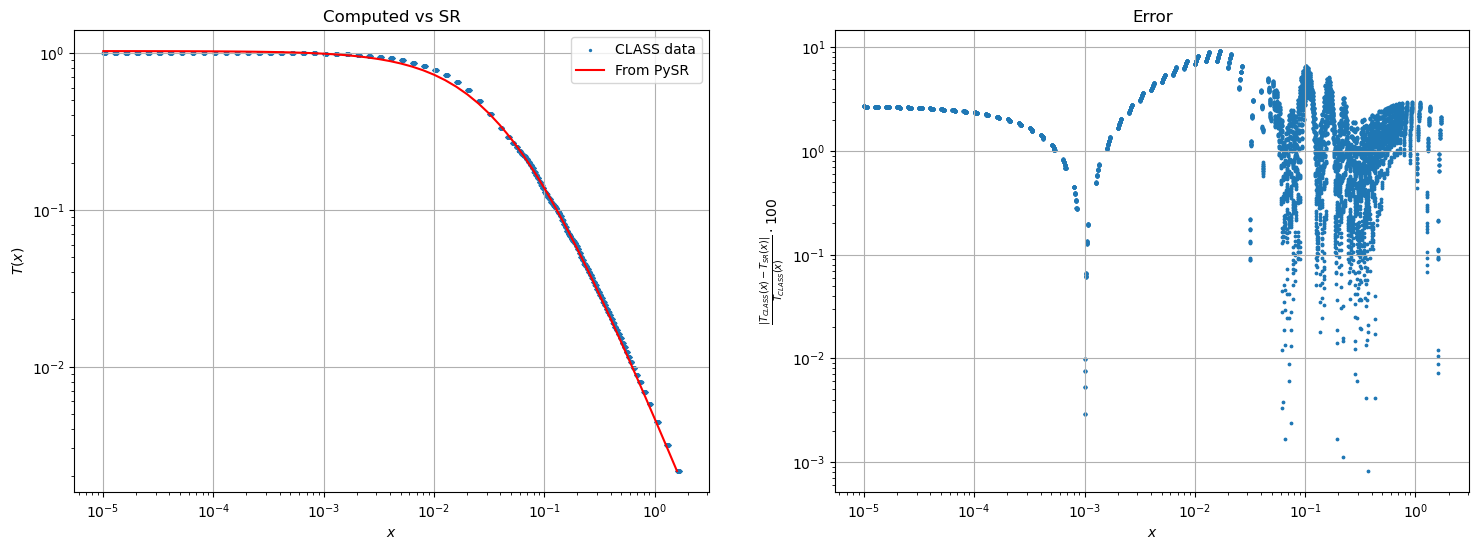

In [38]:
bran2log(k2,y2,T2,'hall_of_fame_2023-09-27_110611.329.pkl')

### $$ \log T(k) = \frac{\log{\left(\frac{0.124}{x^{1.47} + 0.126} \right)}}{\log{\left(10 \right)}} $$


Checking if hall_of_fame_2023-09-27_112508.295.pkl exists...
Loading model from hall_of_fame_2023-09-27_112508.295.pkl
Model equation is:  \frac{\log{\left(\frac{0.124}{x^{1.47} + 0.126} \right)}}{\log{\left(10 \right)}}
The accuracy of the model is:  94.77 %
Max percentage error is:  32.9 %


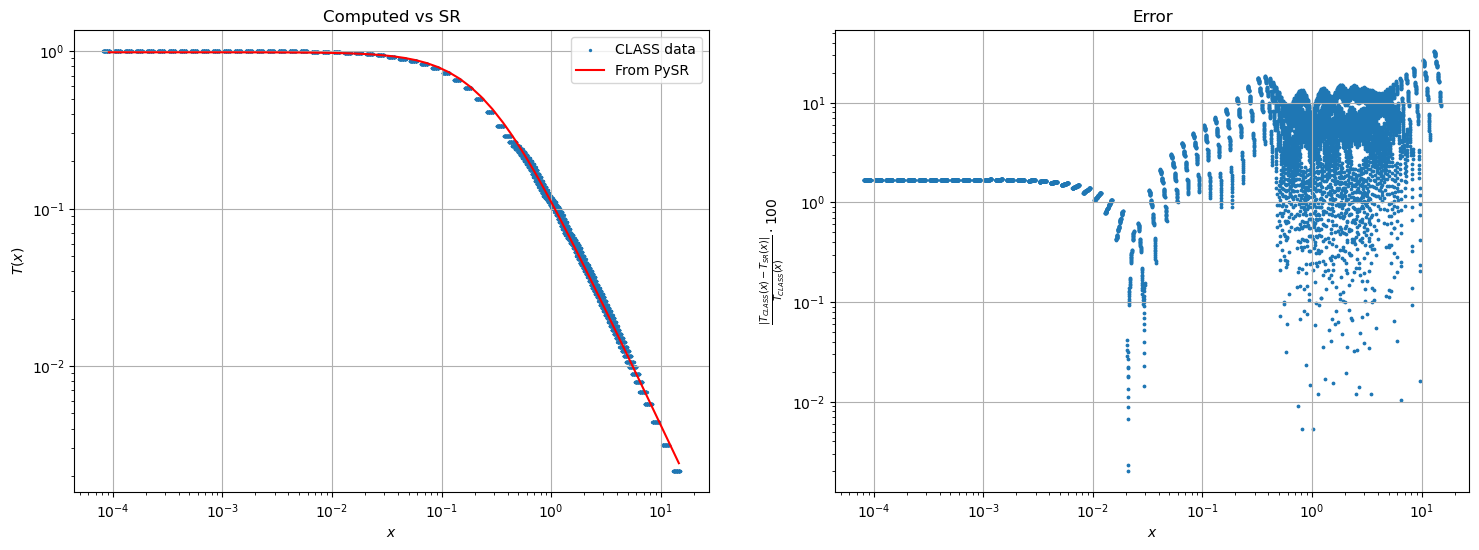

In [41]:
branlog(x2,T2,'hall_of_fame_2023-09-27_112508.295.pkl')